<a href="https://colab.research.google.com/github/coderzaman/Data-Analysis-Notebooks/blob/main/Titanic_Dataset(Classification__base__Datasets_chi_square_test_and_lda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Data Loading and Initial Preprocessing

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")
df


Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Fill missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column as it has too many missing values
df = df.drop('Cabin', axis=1)

# Drop irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


# Data Visualization

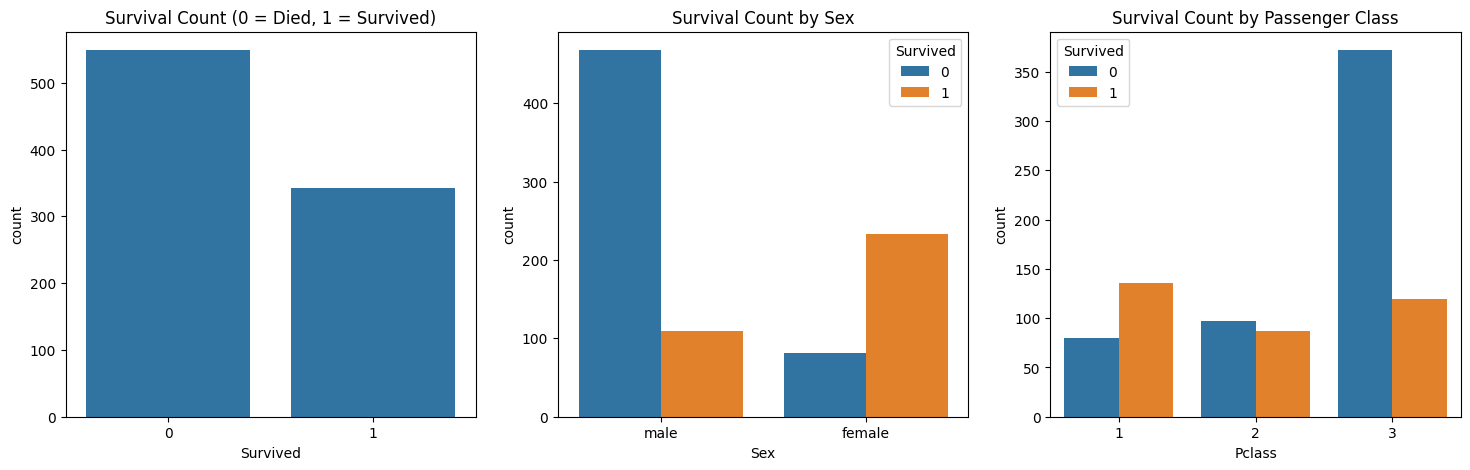

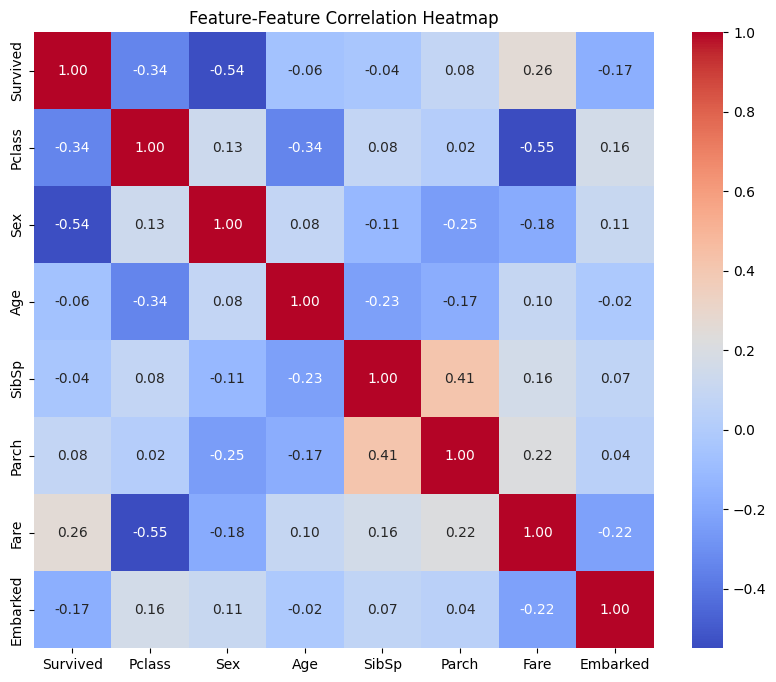

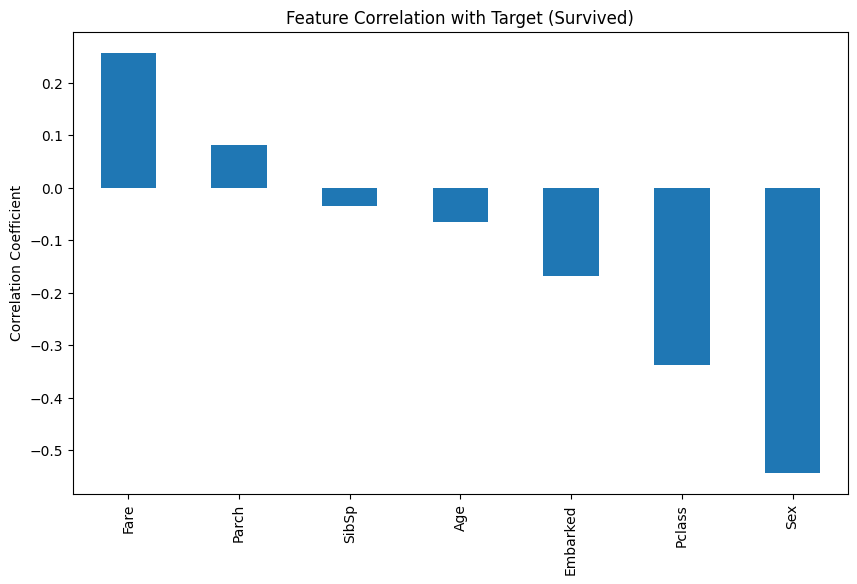

Visualization and Correlation Analysis complete.



In [ ]:
# --- Count Plots for Categorical Features ---
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')

plt.subplot(1, 3, 2)
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('Survival Count by Sex')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()


# --- Feature-Feature Correlation Heatmap ---
# Before creating the heatmap, we need to encode the categorical variables
df_encoded_viz = df.copy()
for col in ['Sex', 'Embarked']:
    df_encoded_viz[col] = LabelEncoder().fit_transform(df_encoded_viz[col])

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded_viz.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Feature Correlation Heatmap')
plt.show()

# --- Feature-Target Correlation Bar Chart ---
plt.figure(figsize=(10, 6))
df_encoded_viz.corr()['Survived'].drop('Survived').sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Correlation with Target (Survived)')
plt.ylabel('Correlation Coefficient')
plt.show()
print("Visualization and Correlation Analysis complete.\n")


# Feature Engineering

**Label Encoding**

In [ ]:
# Use LabelEncoder for 'Sex' and 'Embarked'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


**Feature Selection: Chi-Square Test**

In [ ]:
print("--- 3. Performing Chi-Square Test for Feature Selection ---")
# We will test the relationship between categorical features and the 'Survived' target
categorical_features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Survived'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p_value

print("P-values from Chi-Square test:")
for feature, p_value in chi2_results.items():
    print(f"- {feature}: {p_value:.4f}")

# We select features with a low p-value (e.g., < 0.05) as they are significant
significant_features = [feature for feature, p_value in chi2_results.items() if p_value < 0.05]
print(f"\nSignificant categorical features selected: {significant_features}\n")

--- 3. Performing Chi-Square Test for Feature Selection ---
P-values from Chi-Square test:
- Pclass: 0.0000
- Sex: 0.0000
- Embarked: 0.0000
- SibSp: 0.0000
- Parch: 0.0001

Significant categorical features selected: ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']



In [ ]:
significant_features

['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

**Prepare Data for Models**

In [ ]:
print("--- 4. Preparing Final Data for Modeling ---")
# Select final features (significant categorical + numerical)
numerical_features = ['Age', 'Fare']
final_features = significant_features + numerical_features
X = df[final_features]
y = df['Survived']

# Split data before scaling and LDA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

--- 4. Preparing Final Data for Modeling ---


**Standardization**

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print("Numerical features scaled.\n")


Numerical features scaled.



**Dimensionality Reduction: LDA**

In [ ]:
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
print("Data transformed using LDA. New number of features: 1\n")

Data transformed using LDA. New number of features: 1



**Balancing the Training Data with SMOTE**

In [ ]:
print("--- 5a. Balancing the Training Data with SMOTE ---")
# We apply SMOTE *after* LDA and only to the training data to prevent data leakage.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_lda, y_train)
print(f"Original training set shape: {X_train_lda.shape}")
print(f"Resampled training set shape: {X_train_balanced.shape}")
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print("\n")

--- 5a. Balancing the Training Data with SMOTE ---
Original training set shape: (712, 1)
Resampled training set shape: (878, 1)
Class distribution after SMOTE:
Survived
1    439
0    439
Name: count, dtype: int64




# Model Training and Evaluation

--- Evaluating Logistic Regression ---
Accuracy: 0.7989
Precision: 0.7705
Recall: 0.6812


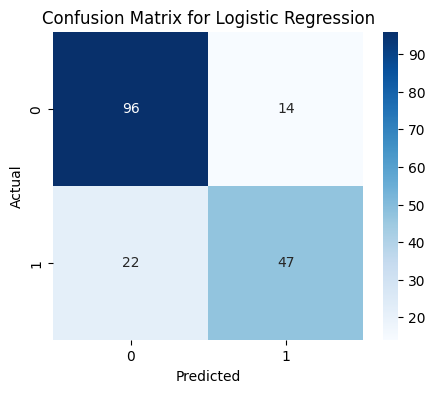

------------------------------
--- Evaluating KNN ---
Accuracy: 0.7765
Precision: 0.7736
Recall: 0.5942


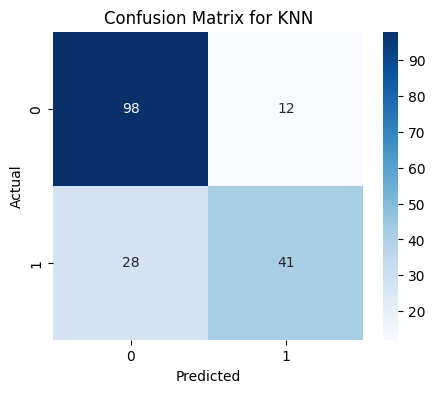

------------------------------
--- Evaluating SVM ---
Accuracy: 0.7933
Precision: 0.8077
Recall: 0.6087


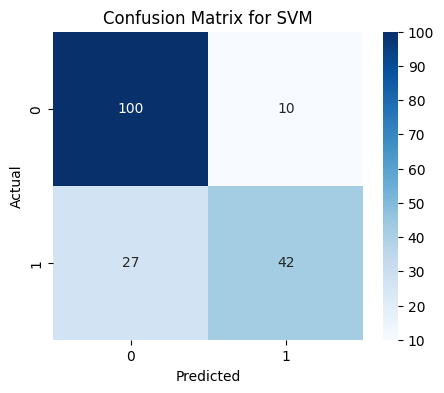

------------------------------
--- Evaluating Decision Tree ---
Accuracy: 0.7598
Precision: 0.7031
Recall: 0.6522


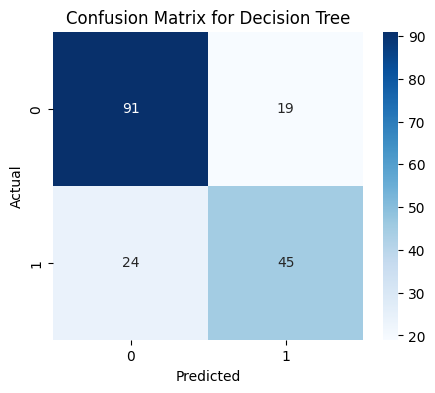

------------------------------


In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- Evaluating {name} ---")

    # Train the model on the LDA-transformed data
    model.fit(X_train_lda, y_train)

    # Make predictions
    y_pred = model.predict(X_test_lda)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-" * 30)
